# **COVID-19 World : Data Insights and Visualizations**

**DATA:** 

**The dataset contains worldwide data inclined to the case record tracking (Count of Confirmed cases, Count of Deaths, Count of Recovered cases) during the Covid-19 pandemic. The insights and plots provided here correspond to the data logged till 07.05.2020**



**I believe data visualizations are most effective methods to illustrate and explain complex information, especially numerical data, in a simple and digestible manner. When performed properly, visualizing data can reduce or help mitigate bias in data interpretation.**

**IMPORTING NECESSARY PACKAGES AND LIBRARY FILES**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

**READING THE DATASET** 

In [66]:
df = pd.read_csv('/content/drive/My Drive/covid_19.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [67]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
28243,NaN,Western Sahara,24.215500,-12.885800,2020-05-07,6,0,5
28244,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-07,187,4,4
28245,NaN,Yemen,15.552727,48.516388,2020-05-07,25,5,1
28246,NaN,Comoros,-11.645500,43.333300,2020-05-07,8,1,0
28247,NaN,Tajikistan,38.861034,71.276093,2020-05-07,461,12,0


**DATA PREPROCESSING**

In [68]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [0]:
#Computation of number of active cases from known data

df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [70]:
df = df.rename(columns={'Country/Region':'Country'})
df.head(5)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [71]:
top = df[df['Date'] == df['Date'].max()]
top.shape

(264, 9)

In [72]:
top['Country'].value_counts()

China             33
Canada            14
France            11
United Kingdom    11
Australia          8
                  ..
Mongolia           1
Burkina Faso       1
US                 1
Andorra            1
Comoros            1
Name: Country, Length: 187, dtype: int64

In [73]:
# Grouping of data with respect to Country, required for furthur visualization

world = top.groupby('Country')['Confirmed','Active','Recovered','Deaths']
world.sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,3563,2989,468,106
1,Albania,842,206,605,31
2,Algeria,5182,2376,2323,483
3,Andorra,752,179,526,47
4,Angola,36,23,11,2
...,...,...,...,...,...
182,West Bank and Gaza,375,197,176,2
183,Western Sahara,6,1,5,0
184,Yemen,25,19,1,5
185,Zambia,153,46,103,4


**DATA VISUALIZATION**

In [74]:
# Plot of worldwide data on Confirmed Cases of COVID-19 on the worldmap

df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]

fig = go.Figure(data=go.Choropleth(locations = df_countries['Country'],locationmode = 'country names',
     z = df_countries['Confirmed'],colorscale = 'Blues',marker_line_color = 'black',marker_line_width = 0.5,))

fig.update_layout(title_text = 'Confirmed Cases Worldwide as of May 7, 2020',title_x = 0.5,
                  geo=dict(showframe = False,showcoastlines = False,))

In [75]:
# Plot of worldwide data on Death Cases of COVID-19 on the worldmap

df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries = df_countries[df_countries['Deaths']>0]

fig = go.Figure(data=go.Choropleth(locations = df_countries['Country'],locationmode = 'country names',
     z = df_countries['Deaths'],colorscale = 'Reds',marker_line_color = 'black',marker_line_width = 1,))

fig.update_layout(title_text = 'Death Cases Worldwide as of May 7, 2020',title_x = 0.5,
                  geo=dict(showframe = False,showcoastlines = False,projection_type = 'equirectangular'))

**Visualization of the data by means of a plot to understand the rate of Active cases, Recovered cases and Deaths cases due to COVID-19 worldwide**

In [76]:
# Grouping of data with respect to date, to find the total number of cases as per date

total_active = df.groupby('Date')['Date','Active'].sum().reset_index()

total_confirmed = df.groupby('Date')['Date','Confirmed'].sum().reset_index()

total_recovered = df.groupby('Date')['Date','Recovered'].sum().reset_index()

total_deaths = df.groupby('Date')['Date','Deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



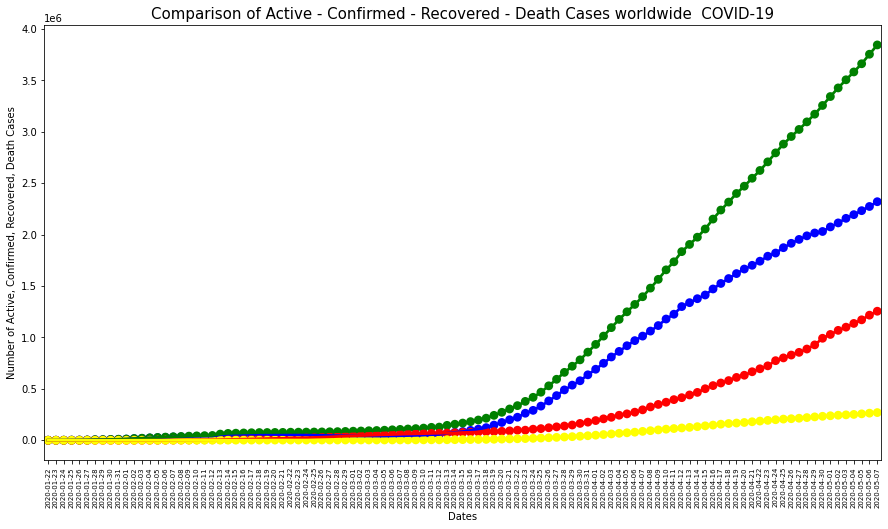

In [77]:
# Plot of graph for comparison view of all cases occuring worldwide

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90, fontsize = 7)

sns.pointplot(total_active['Date'].dt.date, total_active['Active'], color ='blue')
sns.pointplot(total_confirmed['Date'].dt.date, total_confirmed['Confirmed'], color ='green')
sns.pointplot(total_recovered['Date'].dt.date, total_recovered['Recovered'], color ='red')
sns.pointplot(total_deaths['Date'].dt.date, total_deaths['Deaths'], color ='yellow')

plt.title('Comparison of Active - Confirmed - Recovered - Death Cases worldwide  COVID-19', fontsize = 15)
plt.xlabel('Dates')
plt.ylabel('Number of Active, Confirmed, Recovered, Death Cases') 
plt.show()

**Visualization of the Countries having the most number of Confirmed cases around the world**

In [0]:
top_confirmed = top.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).reset_index()

In [79]:
top_20_confirm = top_confirmed.head(20)
top_20_confirm

,Country,Confirmed
0,US,1257023
1,Spain,221447
2,Italy,215858
3,United Kingdom,207977
4,Russia,177160
5,France,174918
6,Germany,169430
7,Brazil,135773
8,Turkey,133721
9,Iran,103135


[]

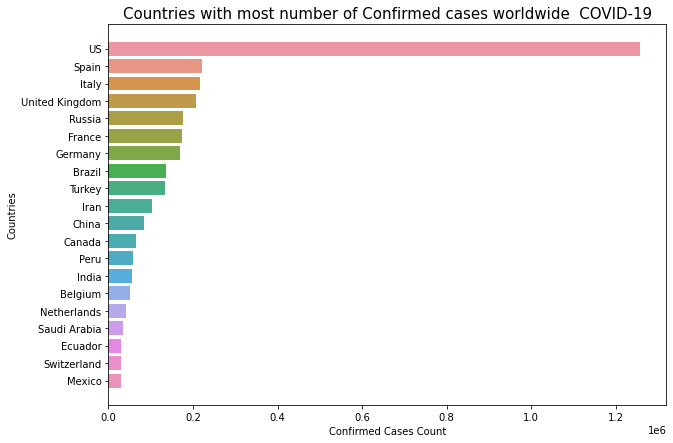

In [80]:
# plot of worldwide confirmed cases data

plt.figure(figsize=(10,7))
sns.barplot(top_20_confirm['Confirmed'],top_20_confirm['Country'])
plt.title("Countries with most number of Confirmed cases worldwide  COVID-19",fontsize = 15)
plt.ylabel("Countries")
plt.xlabel("Confirmed Cases Count")
plt.plot()

**Visualization of the Countries having the most number of Death cases around the world**

In [0]:
top_deaths = top.groupby('Country')['Deaths'].sum().sort_values(ascending=False).reset_index()

In [82]:
top_20_deaths = top_deaths.head(20)
top_20_deaths

,Country,Deaths
0,US,75662
1,United Kingdom,30689
2,Italy,29958
3,Spain,26070
4,France,25990
5,Brazil,9190
6,Belgium,8415
7,Germany,7392
8,Iran,6486
9,Netherlands,5306


[]

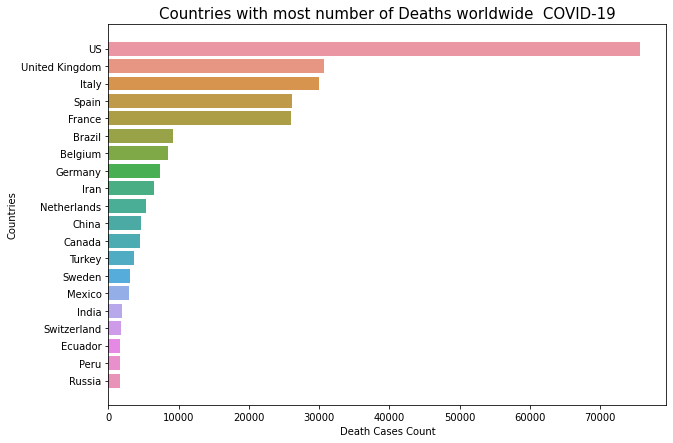

In [83]:
# plot of worldwide death cases data

plt.figure(figsize=(10,7))
sns.barplot(top_20_deaths['Deaths'],top_20_deaths['Country'])
plt.title("Countries with most number of Deaths worldwide  COVID-19",fontsize = 15)
plt.ylabel("Countries")
plt.xlabel("Death Cases Count")
plt.plot()

**Visualization of the Countries having the most number of Active cases around the world**

In [0]:
top_active = top.groupby('Country')['Active'].sum().sort_values(ascending=False).reset_index()

In [85]:
top_20_active = top_active.head(20)
top_20_active

,Country,Active
0,US,986325
1,United Kingdom,176318
2,Russia,151732
3,France,93737
4,Italy,89624
5,Brazil,71233
6,Spain,66866
7,Canada,61660
8,Turkey,47096
9,Peru,38511


[]

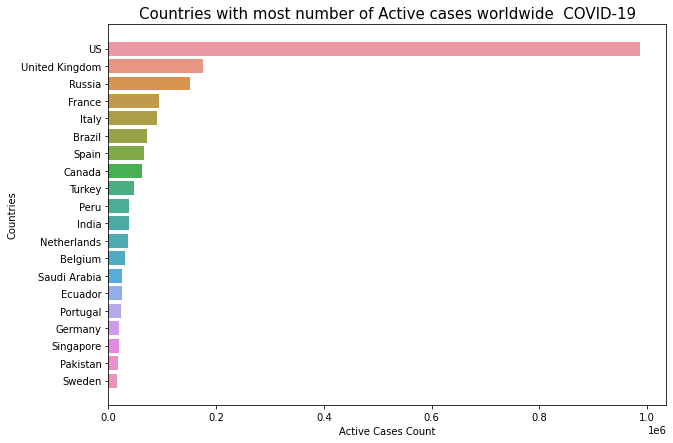

In [86]:
# plot of worldwide active cases data

plt.figure(figsize=(10,7))
sns.barplot(top_20_active['Active'],top_20_active['Country'])
plt.title("Countries with most number of Active cases worldwide  COVID-19",fontsize = 15)
plt.ylabel("Countries")
plt.xlabel("Active Cases Count")
plt.plot()

**Visualization of the Countries having the most number of Recorded cases around the world**

In [0]:
top_recovered = top.groupby('Country')['Recovered'].sum().sort_values(ascending=False).reset_index()

In [88]:
top_20_recovered = top_recovered.head(20)
top_20_recovered

,Country,Recovered
0,US,195036
1,Germany,141700
2,Spain,128511
3,Italy,96276
4,Turkey,82984
5,Iran,82744
6,China,78977
7,Brazil,55350
8,France,55191
9,Switzerland,25900


**Visualization of Indian case history during COVID-19 with other Countries case history**

In [89]:
India = df[df['Country'] == 'India']
India = India.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
India.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [90]:
China = df[df['Country'] == 'China']
China = China.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [91]:
US = df[df['Country'] == 'US']
US = US.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [92]:
Italy = df[df['Country'] == 'Italy']
Italy = Italy.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



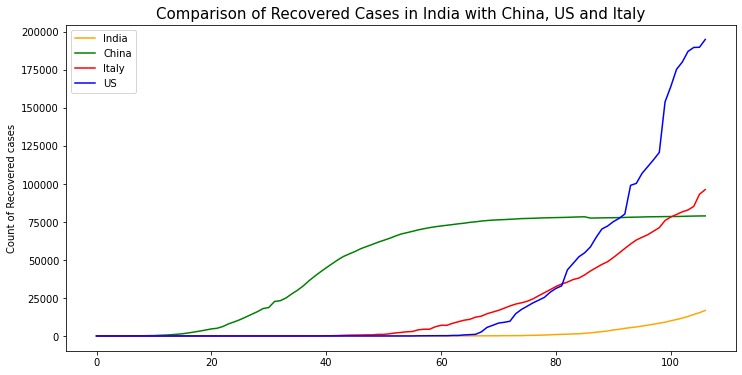

In [93]:
# Plot to compare the number of Recovered Cases in India with China,US and Italy

plt.figure(figsize = (12,6))

plt.plot(India.index,India['Recovered'], color = 'Orange', label = 'India')
plt.plot(China.index,China['Recovered'],color = 'green', label = 'China')
plt.plot(Italy.index,Italy['Recovered'], color = 'red', label = 'Italy')
plt.plot(US.index,US['Recovered'], color = 'blue', label = 'US')

plt.ylabel("Count of Recovered cases")
plt.title("Comparison of Recovered Cases in India with China, US and Italy", fontsize = 15)
plt.legend(loc = 2)
plt.show()

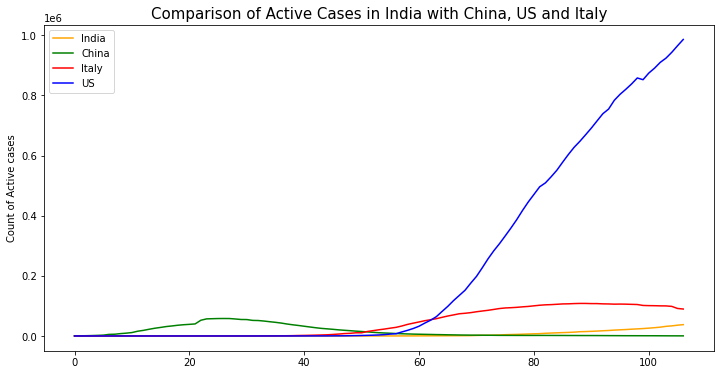

In [94]:
# Plot to compare the number of Active Cases in India with China, US and Italy

plt.figure(figsize = (12,6))

plt.plot(India.index,India['Active'], color = 'Orange', label = 'India')
plt.plot(China.index,China['Active'],color = 'green', label = 'China')
plt.plot(Italy.index,Italy['Active'], color = 'red', label = 'Italy')
plt.plot(US.index,US['Active'], color = 'blue', label = 'US')

plt.ylabel("Count of Active cases")
plt.title("Comparison of Active Cases in India with China, US and Italy", fontsize = 15)
plt.legend(loc = 2)
plt.show()

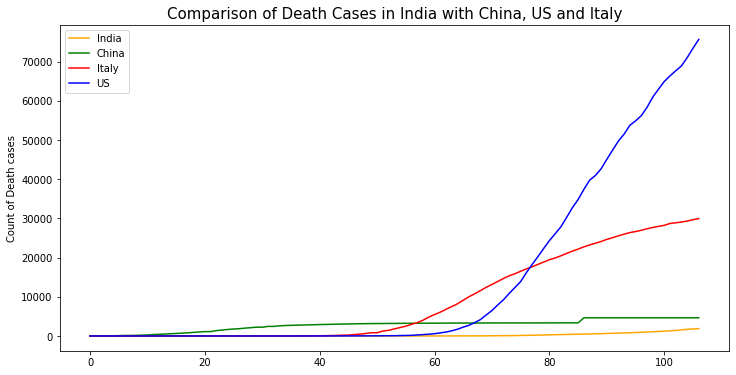

In [95]:
# Plot to compare the number of Deaths Cases in India with China, US and Italy

plt.figure(figsize = (12,6))

plt.plot(India.index,India['Deaths'], color = 'Orange', label = 'India')
plt.plot(China.index,China['Deaths'],color = 'green', label = 'China')
plt.plot(Italy.index,Italy['Deaths'], color = 'red', label = 'Italy')
plt.plot(US.index,US['Deaths'], color = 'blue', label = 'US')

plt.ylabel("Count of Death cases")
plt.title("Comparison of Death Cases in India with China, US and Italy", fontsize = 15)
plt.legend(loc = 2)
plt.show()

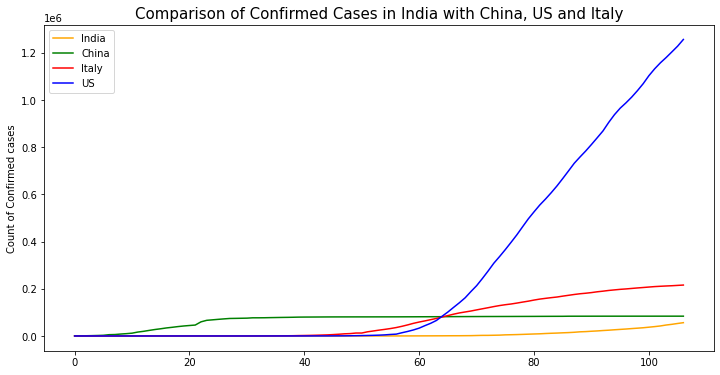

In [96]:
# Plot to compare the number of Confirmed Cases in India with China, US and Italy

plt.figure(figsize = (12,6))

plt.plot(India.index,India['Confirmed'], color = 'Orange', label = 'India')
plt.plot(China.index,China['Confirmed'],color = 'green', label = 'China')
plt.plot(Italy.index,Italy['Confirmed'], color = 'red', label = 'Italy')
plt.plot(US.index,US['Confirmed'], color = 'blue', label = 'US')

plt.ylabel("Count of Confirmed cases")
plt.title("Comparison of Confirmed Cases in India with China, US and Italy", fontsize = 15)
plt.legend(loc = 2)
plt.show()

**From these visualizations,** 


**We are able to infer that US is the most change reciprocating country with respect to the COVID-19 Crisis. We can compare, contrast and understand the trends in the range of Infections caused in India to that of other Countries**